In [1]:
#Importing pandas and re library
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
from pandas_profiling import ProfileReport

In [2]:
#Reading a csv file in a df
df = pd.read_csv(r"C:\Users\saggupta2\Desktop\Sagar Personal Docs\Tiktok Data\Tiktok Influencer Analysis\social media influencers - Tiktok sep 2022.csv")

In [3]:
#Checking columns name
df.columns

#Checking number of rows and columns

print(df.shape)

(1000, 8)


In [4]:
# find the number of null values in each column
null_values = df.isnull().sum()
print(null_values)

S.no             0
Tiktoker name    0
Tiktok name      1
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64


In [5]:
#checking data types in dataframe
df.dtypes

S.no              int64
Tiktoker name    object
Tiktok name      object
Subscribers      object
Views avg.       object
Likes avg.       object
Comments avg.    object
Shares avg.      object
dtype: object

In [6]:
# drop duplicate rows
df1 = df.drop_duplicates()

# drop unnecessary columns

df1= df.drop(["Tiktok name","S.no"], axis=1)

In [7]:
#Checking number of rows and columns

print(df1.shape)

(1000, 6)


In [8]:
#Defining a function to fix the inconsistencies in the data
def extract_number(s):
    """
    This function takes an alphanumeric string if there is M or K at the end in that string than multiply each element
    by 1000000 or 1000 respectively and then after multiplication divide each number by 1000
    
    """
    if s[-1] == 'M':
        return float(s[:-1]) * 1000000 / 1000
    elif s[-1] == 'K':
        return float(s[:-1]) * 1000 / 1000
    else:
        return float(s)

In [9]:
#Modifying Subscribers column by extracting numbers out

df1['Subscribers'] = df1['Subscribers'].apply(extract_number).astype(float)

#Modifying Views avg. column by extracting numbers out

df1['Views avg.'] = df1['Views avg.'].apply(extract_number).astype(float)

#Modifying Likes avg. column by extracting numbers out

df1['Likes avg.'] = df1['Likes avg.'].apply(extract_number).astype(float)

#Modifying Comments avg. column by extracting numbers out

df1['Comments avg.'] = df1['Comments avg.'].apply(extract_number).astype(float)

#Modifying Shares avg. column by extracting numbers out

df1['Shares avg.'] = df1['Shares avg.'].apply(extract_number).astype(float)


In [10]:
df1.dtypes

Tiktoker name     object
Subscribers      float64
Views avg.       float64
Likes avg.       float64
Comments avg.    float64
Shares avg.      float64
dtype: object

In [11]:
# find the number of null values in each column
null_values = df1.isnull().sum()
print(null_values)

Tiktoker name    0
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64


In [12]:
# Now let's have a look at correlation

In [13]:
#Project Assumptions
#Likes vs Views high correlation
#Subscribers vs Likes high correlation
#Subscribers vs Views high correlation


In [14]:
df1.corr(method = 'pearson') #pearson, kendall, spearman

,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
Subscribers,1.000000,0.461304,0.362390,-0.051343,0.089773
Views avg.,0.461304,1.000000,0.746352,-0.111614,-0.071613
Likes avg.,0.362390,0.746352,1.000000,-0.169691,-0.099661
Comments avg.,-0.051343,-0.111614,-0.169691,1.000000,0.139681
Shares avg.,0.089773,-0.071613,-0.099661,0.139681,1.000000


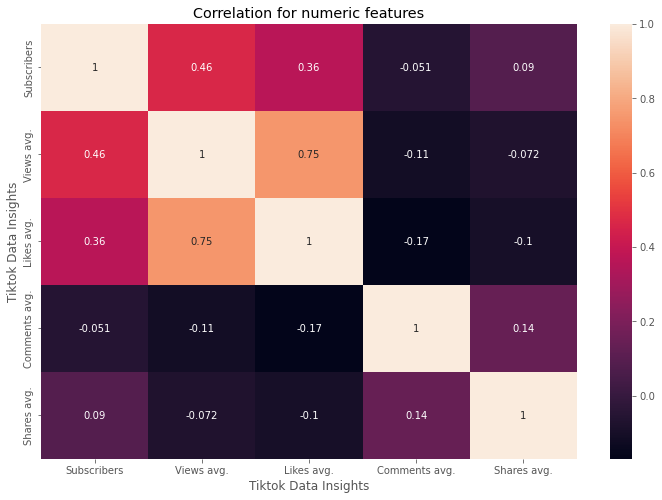

In [15]:
correlation_matrix = df1.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation for numeric features')
plt.xlabel('Tiktok Data Insights')
plt.ylabel('Tiktok Data Insights')

plt.show()

#Anything is black is low correlation and anything is in lighter colors gives more correlation.

<AxesSubplot:xlabel='Likes avg.', ylabel='Views avg.'>

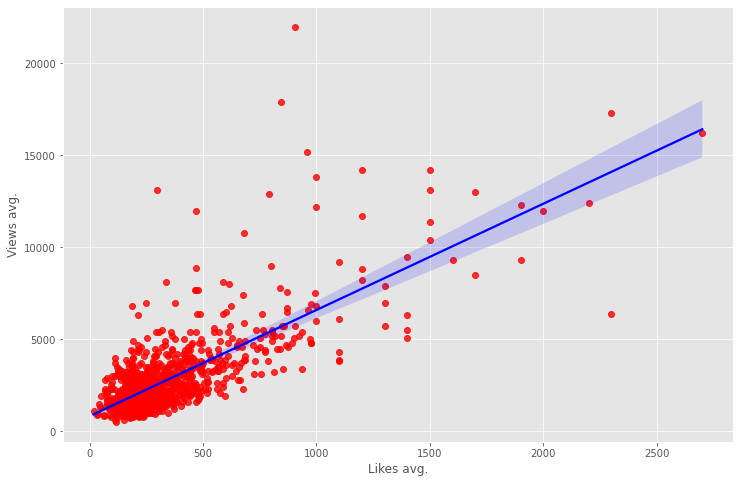

In [16]:
# Plot Budget vs gross using seaborn

sns.regplot(x = 'Likes avg.', y = 'Views avg.', data = df1, scatter_kws={'color':'red'},line_kws = {'color':'blue'})

In [17]:

#Assumption was correct, Likes avg. and View avg. have high correlation


<AxesSubplot:xlabel='Subscribers', ylabel='Likes avg.'>

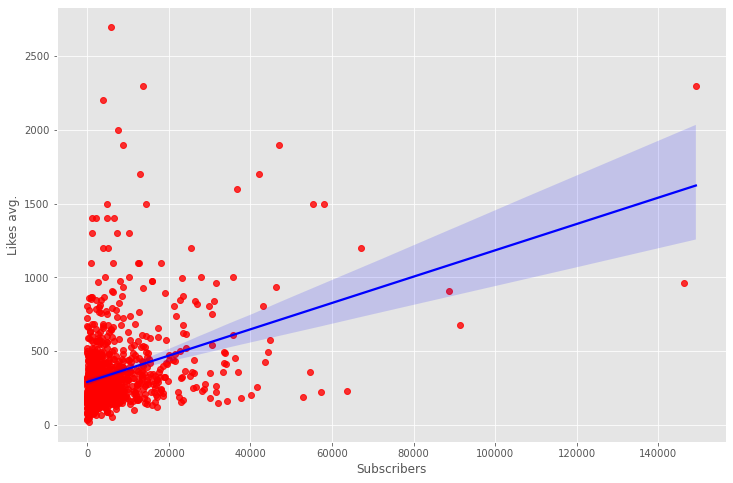

In [18]:
# Plot Subscribers vs Likes avg. using seaborn

sns.regplot(x = 'Subscribers', y = 'Likes avg.', data = df1, scatter_kws={'color':'red'},line_kws = {'color':'blue'})

In [19]:
#As per the table (Refer to Line 35), there is a positive correlation between Subscribers vs Likes avg. but it is not the highest. 
#Hence, It is proved our Second Assumption is incorrect.

<AxesSubplot:xlabel='Subscribers', ylabel='Views avg.'>

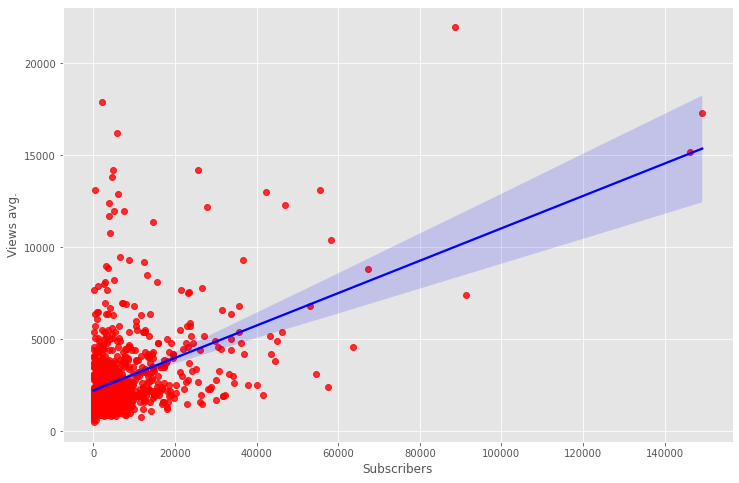

In [20]:
# Plot Subscribers vs Views avg. using seaborn

sns.regplot(x = 'Subscribers', y = 'Views avg.', data = df1, scatter_kws={'color':'red'},line_kws = {'color':'blue'})

In [21]:
#As per the table (Refer to Line 35), there is a positive correlation between Subscribers vs Likes avg. but it is not the highest. 
#Hence, It is proved our Third Assumption is incorrect.

<AxesSubplot:xlabel='Likes avg.', ylabel='Views avg.'>

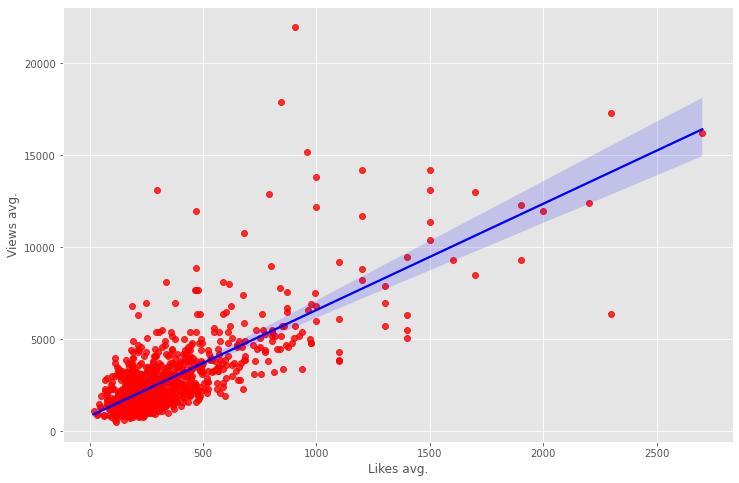

In [22]:
# Plot Budget vs gross using seaborn

sns.regplot(x = 'Likes avg.', y = 'Views avg.', data = df1, scatter_kws={'color':'red'},line_kws = {'color':'blue'})

In [23]:
# Exporting the DataFrame df2 to an Excel file
df1.to_excel(r"C:\Users\saggupta2\Desktop\Sagar Personal Docs\Tiktok Data\Tiktok Influencer Analysis\Tiktok Cleaned data.xlsx", index = False)

In [24]:
#Generate a Report in Pandas Profiling
profile = ProfileReport(df1)
profile.to_file(output_file = "Tiktok_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]